### A linear network for MNIST dataset
##### Add more hidden layers and using L2, dropout
###### Draw the weight and reshpe, with no hidden layers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import os
import gzip

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

import warnings
from IPython.core.interactiveshell import InteractiveShell

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

### Q1 Using Default

In [2]:
data1 = pd.read_csv('Default.txt',sep='\t', header=None)
data1.columns = ['x1', 'x2', 'y']
data = pd.get_dummies(data1, columns=['y'], drop_first=True)

x_data = data[['x1', 'x2']].values
y_data = data['y_Yes'].values

x = torch.tensor(x_data, dtype=torch.float32)
y = torch.tensor(y_data, dtype=torch.float32)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_data, batch_size=2, shuffle=True)
test_loader = DataLoader(test_data, batch_size=2, shuffle=True)

In [3]:
class net1(nn.Module):
    def __init__(self):
        super(net1, self).__init__()
        self.l1 = nn.Linear(2, 1)
    def forward(self, x):
        x = F.sigmoid(self.l1(x))
        return x

model1 = net1()

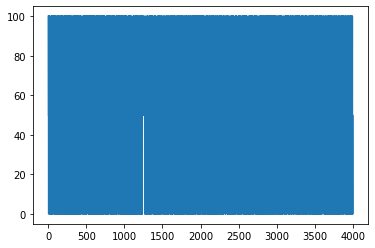

In [4]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=1e-3)

epoch = 100
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model1(x)
        loss1 = criterion(y_pred, y.view(-1, 1))
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())

plt.plot(loss)

### Q2 Mnist with 3 hidden layers

In [2]:
x_train = idx2numpy.convert_from_file('mnist/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('mnist/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('mnist/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('mnist/t10k-labels.idx1-ubyte')

train_data = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).long())
test_data = TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).long())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [3]:
class net2(nn.Module):
    def __init__(self):
        super(net2, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.l1(x))
        x = torch.tanh(self.l2(x))
        x = self.l3(x)
        x = self.l4(x)
        return x

After 1 epoch, loss is 0.7346135377883911
After 2 epoch, loss is 0.34930744767189026
After 3 epoch, loss is 0.355508953332901
After 4 epoch, loss is 0.23765955865383148
After 5 epoch, loss is 0.4269735813140869
After 6 epoch, loss is 0.18437887728214264
After 7 epoch, loss is 0.2539713978767395
After 8 epoch, loss is 0.09410946816205978
After 9 epoch, loss is 0.3164931833744049
After 10 epoch, loss is 0.11874015629291534
After 11 epoch, loss is 0.11800059676170349
After 12 epoch, loss is 0.07236747443675995
After 13 epoch, loss is 0.13024377822875977
After 14 epoch, loss is 0.050389327108860016
After 15 epoch, loss is 0.07195869833230972
After 16 epoch, loss is 0.11053920537233353
After 17 epoch, loss is 0.010931373573839664
After 18 epoch, loss is 0.054764848202466965
After 19 epoch, loss is 0.14540863037109375
After 20 epoch, loss is 0.01244727335870266


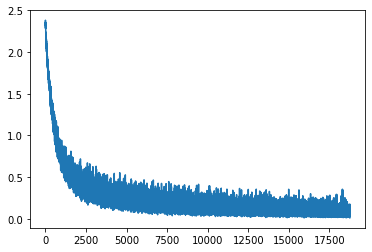

In [4]:
model2 = net2()

model2.train()

critertion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=1e-3)

epoch = 20
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model2(x)
        loss1 = critertion(y_pred, y)
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(loss)

In [51]:
model2.eval()

correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        y_pred = model2(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

net2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)

Accuracy of the network on the 10000 test images: 95 %


net2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)

After 1 epoch, loss is 0.030949434265494347
After 2 epoch, loss is 0.16277751326560974
After 3 epoch, loss is 0.017898691818118095
After 4 epoch, loss is 0.044134534895420074
After 5 epoch, loss is 0.060969606041908264
After 6 epoch, loss is 0.07876385748386383
After 7 epoch, loss is 0.07677033543586731
After 8 epoch, loss is 0.012212725356221199
After 9 epoch, loss is 0.00849837064743042
After 10 epoch, loss is 0.010916047729551792
After 11 epoch, loss is 0.07642175257205963
After 12 epoch, loss is 0.031433530151844025
After 13 epoch, loss is 0.03658362478017807
After 14 epoch, loss is 0.011685380712151527
After 15 epoch, loss is 0.03606713190674782
After 16 epoch, loss is 0.0045656547881662846
After 17 epoch, loss is 0.046932462602853775
After 18 epoch, loss is 0.07574497163295746
After 19 epoch, loss is 0.021380217745900154
After 20 epoch, loss is 0.003640406299382448


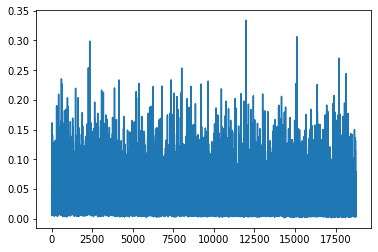

In [54]:
#Using L2 regularization

model2.train()
optimizer = optim.SGD(model2.parameters(), lr=1e-3, weight_decay=1e-5)

epoch = 20
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model2(x)
        loss1 = critertion(y_pred, y)
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(loss)

In [55]:
model2.eval()

correct = 0
total = 0

with torch.no_grad():
    for x, y in test_loader:
        y_pred = model2(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

net2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)

Accuracy of the network on the 10000 test images: 96 %


### Q3 Mnist with 4 hidden layers, Dropout and L2

In [15]:
class net3(nn.Module):
    def __init__(self):
        super(net3, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 32)
        self.l5 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.l1(x))
        x = torch.tanh(self.l2(x))
        x = self.l3(x)
        x = self.l4(x)
        x = self.l5(x)
        x = self.dropout(x)
        return x

net3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=32, bias=True)
  (l5): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

After 1 epoch, loss is 1.4922871589660645
After 2 epoch, loss is 1.1352896690368652
After 3 epoch, loss is 0.8842189311981201
After 4 epoch, loss is 0.7013450264930725
After 5 epoch, loss is 0.660666823387146
After 6 epoch, loss is 0.5487816333770752
After 7 epoch, loss is 0.37553706765174866
After 8 epoch, loss is 0.557024359703064
After 9 epoch, loss is 0.5261552929878235
After 10 epoch, loss is 0.547786295413971
After 11 epoch, loss is 0.28385788202285767
After 12 epoch, loss is 0.44475802779197693
After 13 epoch, loss is 0.44767847657203674
After 14 epoch, loss is 0.373678058385849
After 15 epoch, loss is 0.3435481786727905
After 16 epoch, loss is 0.3159545361995697
After 17 epoch, loss is 0.6215881705284119
After 18 epoch, loss is 0.30962085723876953
After 19 epoch, loss is 0.4957864284515381
After 20 epoch, loss is 0.44039100408554077


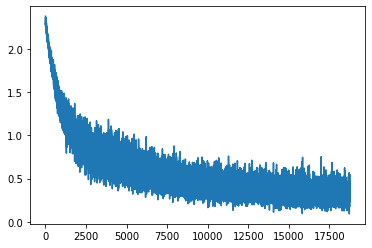

In [16]:
model3 = net3()

model3.train()

critertion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=1e-3, weight_decay=1e-5)

epoch = 20
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model3(x)
        loss1 = critertion(y_pred, y)
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(loss)

In [17]:
model3.eval()

correct = 0
total = 0

with torch.no_grad():
    for x, y in test_loader:
        y_pred = model3(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

net3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=32, bias=True)
  (l5): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Accuracy of the network on the 10000 test images: 96 %


### Q4 Fashion-Mnist with 2 hidden layers

In [13]:
def load_mnist_sub(path, kind):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=0)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=0).reshape(len(labels), 784)

    return images, labels

x_train, y_train = load_mnist_sub('fashion_sub', kind='train_sub')
x_test, y_test = load_mnist_sub('fashion_sub', kind='test_sub')

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [25]:
class net4(nn.Module):
    def __init__(self):
        super(net4, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 100)
        self.l3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.l1(x))
        x = torch.tanh(self.l2(x))
        x = self.l3(x)
        return x

net4(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=10, bias=True)
)

After 1 epoch, loss is 1.2663979530334473
After 2 epoch, loss is 1.146286964416504
After 3 epoch, loss is 1.1687453985214233
After 4 epoch, loss is 0.8370628356933594
After 5 epoch, loss is 0.5051360130310059
After 6 epoch, loss is 1.003195881843567
After 7 epoch, loss is 1.114830493927002
After 8 epoch, loss is 0.43773970007896423
After 9 epoch, loss is 0.4876434803009033
After 10 epoch, loss is 1.027235746383667
After 11 epoch, loss is 0.7832172513008118
After 12 epoch, loss is 0.9242568016052246
After 13 epoch, loss is 0.7727612257003784
After 14 epoch, loss is 0.7893733382225037
After 15 epoch, loss is 0.7011507749557495
After 16 epoch, loss is 0.28252875804901123
After 17 epoch, loss is 0.7311955094337463
After 18 epoch, loss is 0.46802961826324463
After 19 epoch, loss is 0.5433268547058105
After 20 epoch, loss is 0.6529744863510132


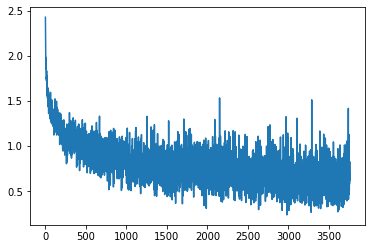

In [26]:
model4 = net4()

model4.train()

critertion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model4.parameters(), lr=1e-3)

epoch = 20
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model4(x)
        loss1 = critertion(y_pred, y)
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(loss)

In [27]:
model4.eval()

correct = 0
total = 0

with torch.no_grad():
    for x, y in test_loader:
        y_pred = model4(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 2999 test images: %d %%' % (100 * correct / total))

net4(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=10, bias=True)
)

Accuracy of the network on the 2999 test images: 72 %


### Q5 Mnist with weight matrix

In [3]:
# network with no hidden layer

class net5(nn.Module):
    def __init__(self):
        super(net5, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(784, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        return x

After 1 epoch, loss is 26.672222137451172
After 2 epoch, loss is 11.956439971923828
After 3 epoch, loss is 8.95389175415039
After 4 epoch, loss is 12.266016006469727
After 5 epoch, loss is 18.59329605102539
After 6 epoch, loss is 37.02199172973633
After 7 epoch, loss is 0.0
After 8 epoch, loss is 24.186025619506836
After 9 epoch, loss is 14.945781707763672
After 10 epoch, loss is 20.10601806640625
After 11 epoch, loss is 15.886828422546387
After 12 epoch, loss is 10.541671752929688
After 13 epoch, loss is 0.0006582175847142935
After 14 epoch, loss is 14.431650161743164
After 15 epoch, loss is 7.337377548217773
After 16 epoch, loss is 14.703798294067383
After 17 epoch, loss is 2.928107261657715
After 18 epoch, loss is 4.528280258178711
After 19 epoch, loss is 17.814926147460938
After 20 epoch, loss is 6.539333343505859
Accuracy of the network on the 10000 test images: 82 %


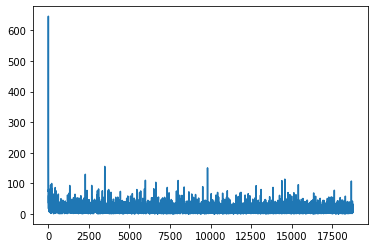

In [4]:
model5 = net5()

model5.train()

critertion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model5.parameters(), lr=1e-3)

epoch = 20
loss = []

for i in range(epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model5(x)
        loss1 = critertion(y_pred, y)
        loss1.backward()
        optimizer.step()
        loss.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(loss)


model5.eval()

correct = 0
total = 0

with torch.no_grad():
    for x, y in test_loader:
        y_pred = model5(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

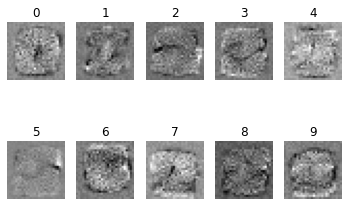

In [6]:
# print the weights

weight = model5.l1.weight.data.numpy()
weight = weight.reshape(10, 28, 28)

labels = [i for i in range(10)]

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(weight[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.show()